In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [32]:
root_dir = os.path.join(os.getcwd(), '..','..','..')
data_dir = os.path.join(root_dir, 'data/sim/') 
os.chdir(root_dir)


In [33]:
from src.data_preprocessing.sim.sim_data_generator import SynthesisTS

synth_maker = SynthesisTS(cycle_periods = [1,7,30] , seq_len =420, series_amount = 30, distort_cycles=False)
stationary = synth_maker.synthesize_series()
trend = synth_maker.add_multiplicative_trend(stationary, trend_rate=1.003)
intervention, treated_units = synth_maker.add_intervention(stationary, type = 'hom')


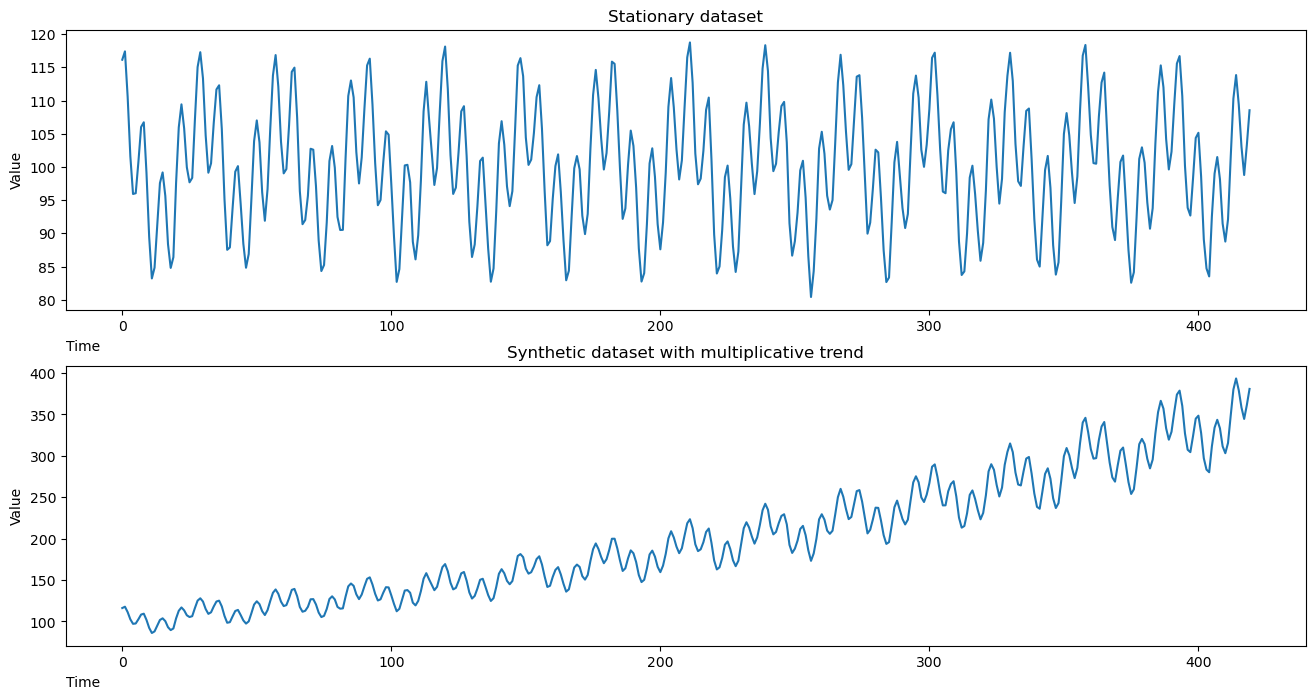

In [34]:
fig , ax = plt.subplots( 2,1 , figsize = (16,8))
ax[0].plot(stationary.index, stationary[1])
ax[0].title.set_text('Stationary dataset')
ax[1].plot(trend.index, trend[1])
ax[1].title.set_text('Synthetic dataset with multiplicative trend')

ax[0].set_xlabel('Time', loc = 'left')
ax[0].set_ylabel('Value')
ax[1].set_xlabel('Time', loc = 'left')
ax[1].set_ylabel('Value')

plt.show()

In [35]:
average_all = np.mean(stationary,axis = 1)

num_control = int(stationary.shape[1] * 0.7)
treated_units = stationary.iloc[:, num_control:]
average_treated = np.mean(treated_units, axis = 1)
average_treated_pre = np.mean(treated_units.iloc[:len(treated_units)-24,], axis = 1)

average_int = np.mean(intervention.iloc[:,num_control:], axis = 1)


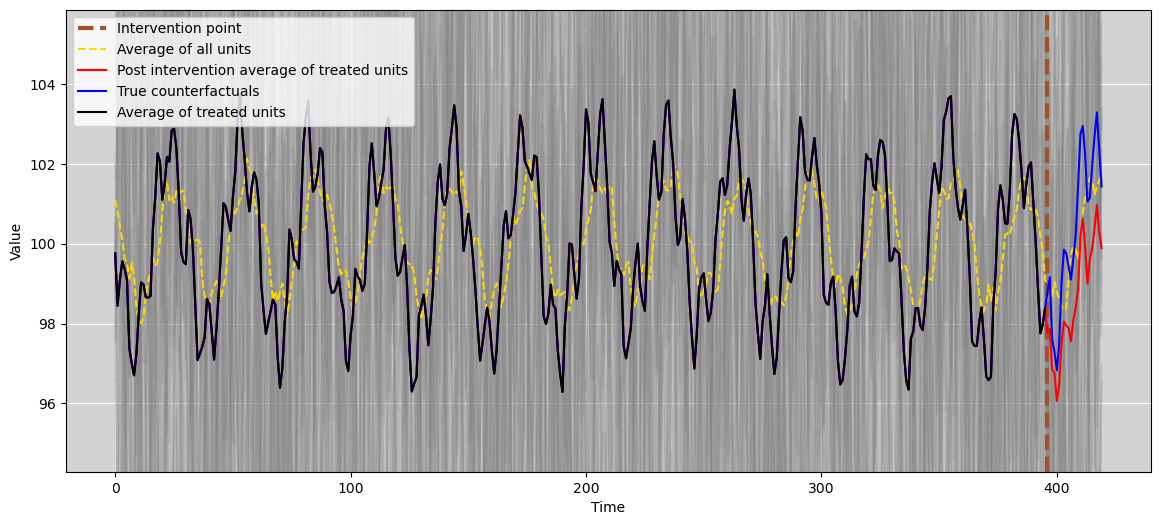

In [43]:
fig , ax  = plt.subplots(figsize=(14,6))
for i in range(stationary.shape[1]):
    ax.plot(stationary.index, stationary.iloc[:,i], alpha = 0.2, c = 'grey')

    
ax.axvline(x= len(average_all)-24, color = 'sienna', linestyle = 'dashed', label = 'Intervention point', linewidth = 3)    
ax.plot(average_all, c= 'gold', linestyle = 'dashed', label = 'Average of all units')
ax.plot(average_int, c= 'red', label = 'Post intervention average of treated units')
ax.plot(average_treated, c= 'blue', label = 'True counterfactuals')
ax.plot(average_treated_pre, c= 'black',   label = 'Average of treated units')
ax.set_ylim(np.min(average_treated)-2, max(average_int)+2)
ax.legend(loc = 'upper left')
ax.set_facecolor('lightgrey')
ax.grid(c='white')
ax.set_xlabel('Time')
ax.set_ylabel('Value')

plt.show()